In [7]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# FER2013 dataset

/Users/kraligan/.cache/kagglehub/datasets/msambare/fer2013/versions/1/train/happy/Training_50449107.jpg
shape:  (48, 48, 3)
/Users/kraligan/.cache/kagglehub/datasets/msambare/fer2013/versions/1/train/sad/Training_86437620.jpg
shape:  (48, 48, 3)
/Users/kraligan/.cache/kagglehub/datasets/msambare/fer2013/versions/1/train/fear/Training_19995150.jpg
shape:  (48, 48, 3)
/Users/kraligan/.cache/kagglehub/datasets/msambare/fer2013/versions/1/train/surprise/Training_53079763.jpg
shape:  (48, 48, 3)
/Users/kraligan/.cache/kagglehub/datasets/msambare/fer2013/versions/1/train/neutral/Training_27707774.jpg
shape:  (48, 48, 3)
/Users/kraligan/.cache/kagglehub/datasets/msambare/fer2013/versions/1/train/angry/Training_35668808.jpg
shape:  (48, 48, 3)
/Users/kraligan/.cache/kagglehub/datasets/msambare/fer2013/versions/1/train/disgust/Training_2580532.jpg
shape:  (48, 48, 3)


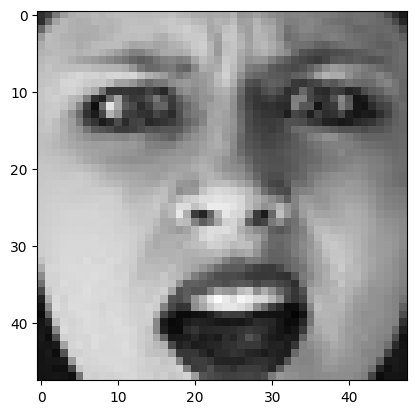

In [9]:
data_path = os.path.expanduser("~/.cache/kagglehub/datasets/msambare/fer2013/versions/1") 

# extract landmarks for each image
for emotion_idx, emotion in enumerate(os.listdir(os.path.join(data_path, "train/"))):
    for img_name in os.listdir(os.path.join(data_path, f"train/{emotion}")):
        img_path = os.path.join(data_path, f"train/{emotion}/{img_name}")
        print(img_path)
        img = cv2.imread(img_path)
        plt.imshow(img)
        print("shape: ", img.shape)
        
        break

I0000 00:00:1751996896.213391  822971 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.4), renderer: Apple M1
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1751996896.215728  869568 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1751996896.219864  869568 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1751996896.242849  869568 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.


Image: /Users/kraligan/.cache/kagglehub/datasets/msambare/fer2013/versions/1/train/happy/Training_50449107.jpg


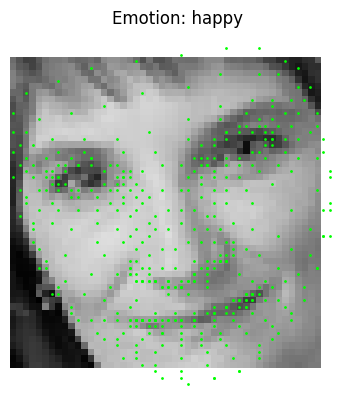

In [4]:
import os
import cv2
import matplotlib.pyplot as plt
import mediapipe as mp

# Initialiser MediaPipe Face Mesh
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True)

# Dataset path
data_path = os.path.expanduser("~/.cache/kagglehub/datasets/msambare/fer2013/versions/1") 

# Extraire une seule image pour test
for emotion_idx, emotion in enumerate(os.listdir(os.path.join(data_path, "train/"))):
    for img_name in os.listdir(os.path.join(data_path, f"train/{emotion}")):
        img_path = os.path.join(data_path, f"train/{emotion}/{img_name}")
        print(f"Image: {img_path}")

        # Chargement et conversion
        img = cv2.imread(img_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        h, w, _ = img.shape

        # Détection des landmarks
        results = face_mesh.process(img_rgb)

        # Affichage image + landmarks
        plt.imshow(img_rgb)
        if results.multi_face_landmarks:
            for face_landmarks in results.multi_face_landmarks:
                for lm in face_landmarks.landmark:
                    x, y = int(lm.x * w), int(lm.y * h)
                    plt.scatter(x, y, c='lime', s=1)

        plt.title(f"Emotion: {emotion}")
        plt.axis('off')
        plt.show()

        break  # Pour ne prendre qu'une seule image par catégorie
    break  # Supprime ce `break` pour tester toutes les classes

In [ ]:
import numpy as np

data = np.loadtxt("data/dataset.txt")
print("Shape:", data.shape)

X = data[:, :-1]  # landmarks (shape: [n_samples, 1404])
y = data[:, -1]   # labels (shape: [n_samples])
print(np.unique(y))

Shape: (28709, 1405)
21.0


# Affectnet datset

I0000 00:00:1751998116.281668  822971 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.4), renderer: Apple M1
W0000 00:00:1751998116.287015  893054 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1751998116.294382  893057 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Image: /Users/kraligan/.cache/kagglehub/datasets/mstjebashazida/affectnet/versions/1/train/happy/ffhq_2508.png


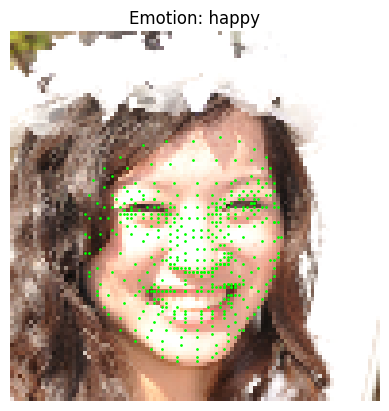

In [5]:
import os
import cv2
import matplotlib.pyplot as plt
import mediapipe as mp

# Initialiser MediaPipe Face Mesh
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True)

# Dataset path
data_path = os.path.expanduser("~/.cache/kagglehub/datasets/mstjebashazida/affectnet/versions/1")

# Extraire une seule image pour test
for emotion_idx, emotion in enumerate(os.listdir(os.path.join(data_path, "train/"))):
    for img_name in os.listdir(os.path.join(data_path, f"train/{emotion}")):
        img_path = os.path.join(data_path, f"train/{emotion}/{img_name}")
        print(f"Image: {img_path}")

        # Chargement et conversion
        img = cv2.imread(img_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        h, w, _ = img.shape

        # Détection des landmarks
        results = face_mesh.process(img_rgb)

        # Affichage image + landmarks
        plt.imshow(img_rgb)
        if results.multi_face_landmarks:
            for face_landmarks in results.multi_face_landmarks:
                for lm in face_landmarks.landmark:
                    x, y = int(lm.x * w), int(lm.y * h)
                    plt.scatter(x, y, c='lime', s=1)

        plt.title(f"Emotion: {emotion}")
        plt.axis('off')
        plt.show()

        break  # Pour ne prendre qu'une seule image par catégorie
    break  # Supprime ce `break` pour tester toutes les classes

In [6]:
import numpy as np

data = np.loadtxt("data/dataset_Affectnet.txt")
print("Shape:", data.shape)

X = data[:, :-1]  # landmarks (shape: [n_samples, 1404])
y = data[:, -1]   # labels (shape: [n_samples])
print(np.unique(y))

Shape: (14518, 1405)
[0. 1. 2. 3. 4. 5. 6. 7.]


In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled[0][0:20])

[ 0.33332392 -0.23563314  0.89364242  0.54191163  0.64110393  0.57337616
  0.45612074  0.38640479  0.55983332  0.52112461  1.0425593  -0.02882933
  0.53661347  0.75481095  0.51156938  0.5081396   0.89977956  0.34400128
  0.32576845  1.25509299]
